In [2]:
#Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import scipy as sci
from lmfit.models import LorentzianModel
from lmfit.models import VoigtModel

In [3]:
def Data(l:str):
    direccion = l
    data = pd.read_csv(direccion, delimiter='\t')
    return data

#Actividad 1
Data1A1 = Data(r'C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\Datos de actividad 1 3 a 55 grados')

#Actividad 2 calibración
Data1A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\Datos 2 cristal LiF sin material 6 a 16 grados")

#Actividad 2 Al
Data2A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal LiF Al002 6 a 16 grados")
Data3A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\Datos 2 cristal LiF Al004 6 a 16 grados")
Data4A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal LiF Al006 6 a 16 grados")
Data5A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal LiF Al008 6 a 16 grados")

#Actividad 2 Zn
Data6A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal Zn 0025 6 a 16 grados")
Data7A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal Zn 005 6 a 16 grados")
Data8A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal Zn 0075 6 a 16 grados")
Data9A2 = Data(r"C:\Users\clauw\Documents\Programming\Laboratorio-Intermedio---Pr-cticas20242\Rayos X\datos 2 cristal Zn 001 6 a 16 grados")


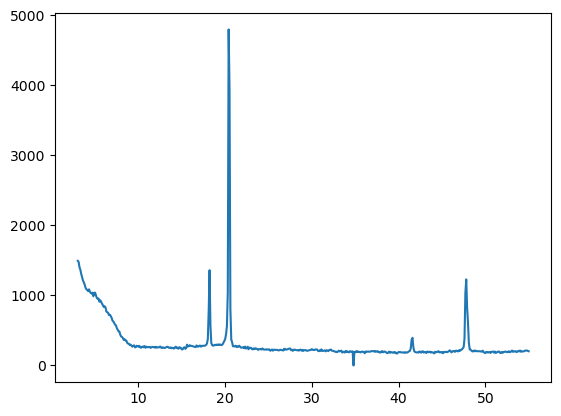

In [28]:
plt.plot(Data1A1['Ang'],Data1A1['In'])

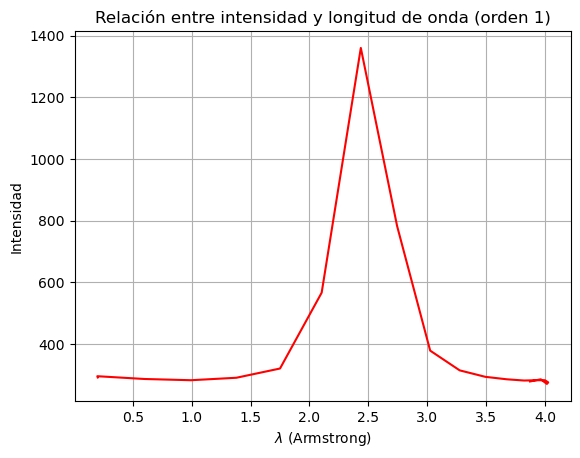

In [60]:
dZn = 2.014
x1 = []
y1 = []

x11 = []
y11 = []

for i in range(0,521):
    if Data1A1['Ang'][i]>=17.0 and Data1A1['Ang'][i]<19.0: 
        x1.append(np.abs(2*dZn*(np.sin(Data1A1['Ang'][i]))/1))
        y1.append(Data1A1['In'][i])

    if Data1A1['Ang'][i]>=20.0 and Data1A1['Ang'][i]<21.0: 
        x11.append(np.abs(2*dZn*(np.sin(Data1A1['Ang'][i]))/1))
        y11.append(Data1A1['In'][i])

plt.plot(x1,y1,color='r')

plt.grid()
plt.title('Relación entre intensidad y longitud de onda (orden 1)')
plt.xlabel(r"$\lambda$ (Armstrong)")
plt.ylabel('Intensidad')
plt.show()


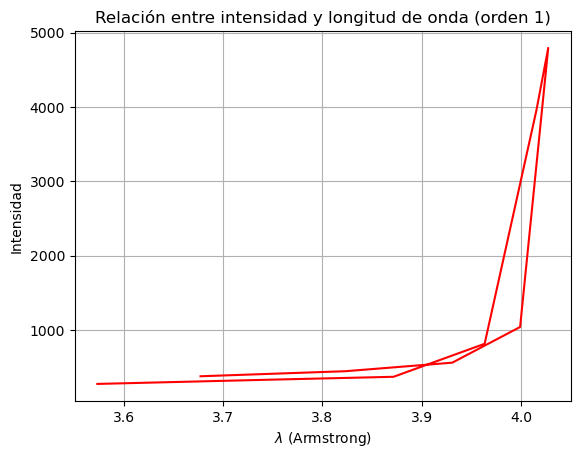

In [61]:
plt.plot(x11,y11,color='r')
plt.grid()
plt.title('Relación entre intensidad y longitud de onda (orden 1)')
plt.xlabel(r"$\lambda$ (Armstrong)")
plt.ylabel('Intensidad')
plt.show()


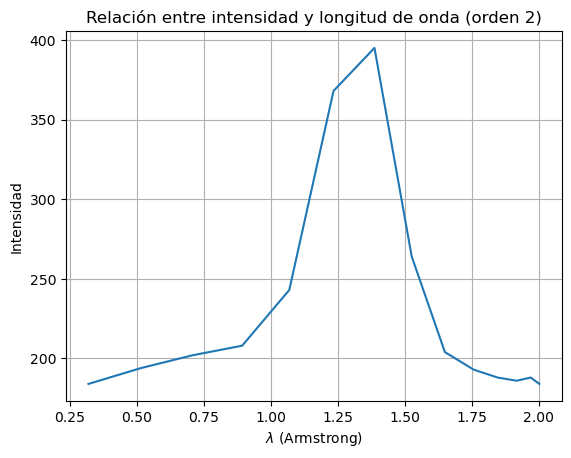

In [65]:
dZn = 2.014
x1 = []
y1 = []

for i in range(0,521):
    if Data1A1['Ang'][i]>=41.0 and Data1A1['Ang'][i]<42.4: 
        x1.append(np.abs(2*dZn*(np.sin(Data1A1['Ang'][i]))/2))
        y1.append(Data1A1['In'][i])

plt.plot(x1,y1)
plt.grid()
plt.title('Relación entre intensidad y longitud de onda (orden 2)')
plt.xlabel(r"$\lambda$ (Armstrong)")
plt.ylabel('Intensidad')
plt.show()

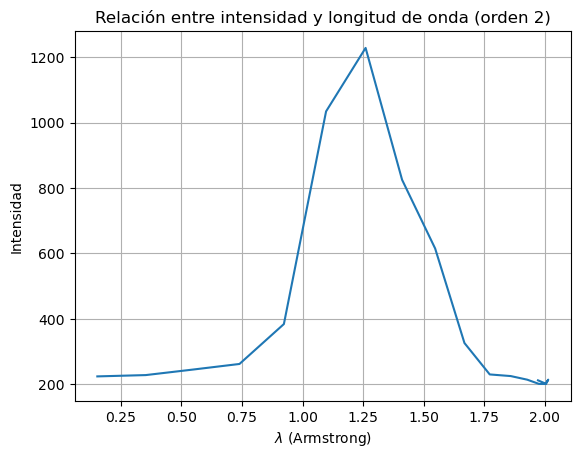

In [71]:
dZn = 2.014
x1 = []
y1 = []

for i in range(0,521):
    if Data1A1['Ang'][i]>=47.2 and Data1A1['Ang'][i]<49.0: 
        x1.append(np.abs(2*dZn*(np.sin(Data1A1['Ang'][i]))/2))
        y1.append(Data1A1['In'][i])

plt.plot(x1,y1)
plt.grid()
plt.title('Relación entre intensidad y longitud de onda (orden 2)')
plt.xlabel(r"$\lambda$ (Armstrong)")
plt.ylabel('Intensidad')
plt.show()

In [ ]:
#Para regresiones lineales o polinómicas de cualquier orden
# def GetFit(x,y,n=1):
    
#     l = x.shape[0]
#     b = y
    
#     A = np.ones((l,n+1))
    
#     for i in range(1,n+1):
#         A[:,i] = x**i
        
#     AT = np.dot(A.T,A)
#     bT = np.dot(A.T,b)
    
#     xsol = np.linalg.solve(AT,bT)
    
#     return xsol

# def GetModel(x,p):
#     y = 0
#     for n in range(len(p)):
#         y += p[n]*x**n
        
#     return y

# _x = np.linspace(0,10,2)

# param = GetFit(x,y)
# ym = GetModel(_x,param_az)

In [ ]:
#Obtener medidas de incertidumbre

# def GetR2(x,y):
#     matrix = np.corrcoef(x, y)
#     R2 = (matrix[0,1])**2
#     return R2

#Desviacion estandar
#std = np.std(x,axis=0)
#Varianza
#var = np.var(x,axis=0)

#Residuales 
# def Residuals(y,ym_az):
#     e = []
#     for i in range(0,len(y)):
#         e.append(y[i]-ym[i])
#     return e

In [ ]:
#Regresion lorentziana
# model = LorentzianModel()
# params = model.guess(y, x=freq)
# result = model.fit(y, params, x=freq)
# result.plot_fit()
# plt.show()

In [ ]:
#Perfil de Voight
# alpha = std*np.sqrt(2*np.ln(2))
# mod = VoigtModel()
# pars = mod.guess(y, x=x)
# out = mod.fit(y, pars, x=x)
# out.plot()

In [ ]:
#Graficas
# plt.errorbar(x, y,xerr,capsize=1.5,color='b',fmt='.')
# plt.plot(x,y,color='b')
# plt.title('Gráfica')
# plt.xlabel('C')
# plt.ylabel('V')
# plt.text(6, 7.5, 'y={}x + {}'.format(round(param[1],2),round(param[0],2)),color='b')
# plt.text(6,7.1,'R^2= {}'.format(round(GetR2(x,y),2)),color='b')
# plt.legend()
# plt.show()